In [88]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense 
from keras.models import Sequential 
from keras.models import model_from_json 

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from keras.utils.vis_utils import plot_model

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import pickle
from os import path
import os
print(os.listdir("../input"))

['KDDTest+.txt', 'KDDTest-21.txt', 'KDDTrain+.txt']


In [89]:
#NSL-KDD DATASET
train = '../input/KDDTrain+.txt'
test = '../input/KDDTest+.txt'

In [90]:
#FEATURES AND COLUMNS WHICH HAS "OBJECT" DATA TYPES
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']
#ASSIGN ATTACKS
binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']
  

In [91]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [92]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [93]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [94]:
# DROP THE LAST COLUMN
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [95]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [96]:
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

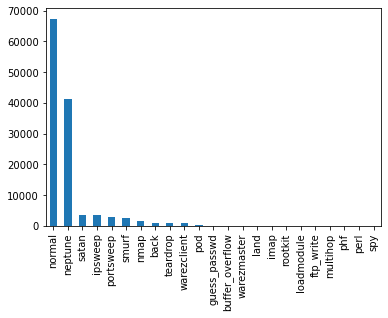

In [97]:
#ATTACK TYPES ON BAR GRAPH
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")
bar_graph('label')

In [98]:
#ATTACK TYPE PLACEMENT
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [99]:
#ATTACK TYPES CLASSIFICATION
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

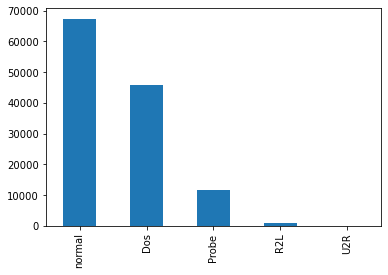

In [100]:
#BAR GRAPH
change_label(train_data)
bar_graph('label')

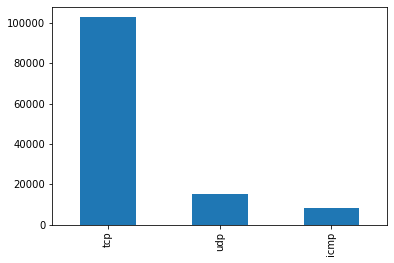

In [101]:
#BAR GRAPH
bar_graph('protocol_type')

In [102]:
# LABELS DEFINED AS NORMAL AND ABNORMAL 
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))
bin_data = train_data.copy()
bin_data['label'] = bin_label
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

# ONE-HOT ENCODING
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
bin_data['intrusion'] =enc_label

bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)

numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

numeric_bin_data


C:\Users\house\AppData\Local\Temp/ipykernel_2084/131455417.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin_data['intrusion'] = bin_data['intrusion']


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [103]:
#BINARY LABELS DF SIZE -NUMERIC
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [104]:
#BINARY LABELS DF SIZE -ALL
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [105]:
# CORRELATION 
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [106]:
#BINARY LABELS
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [107]:
#CORRELATION SHAPE
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


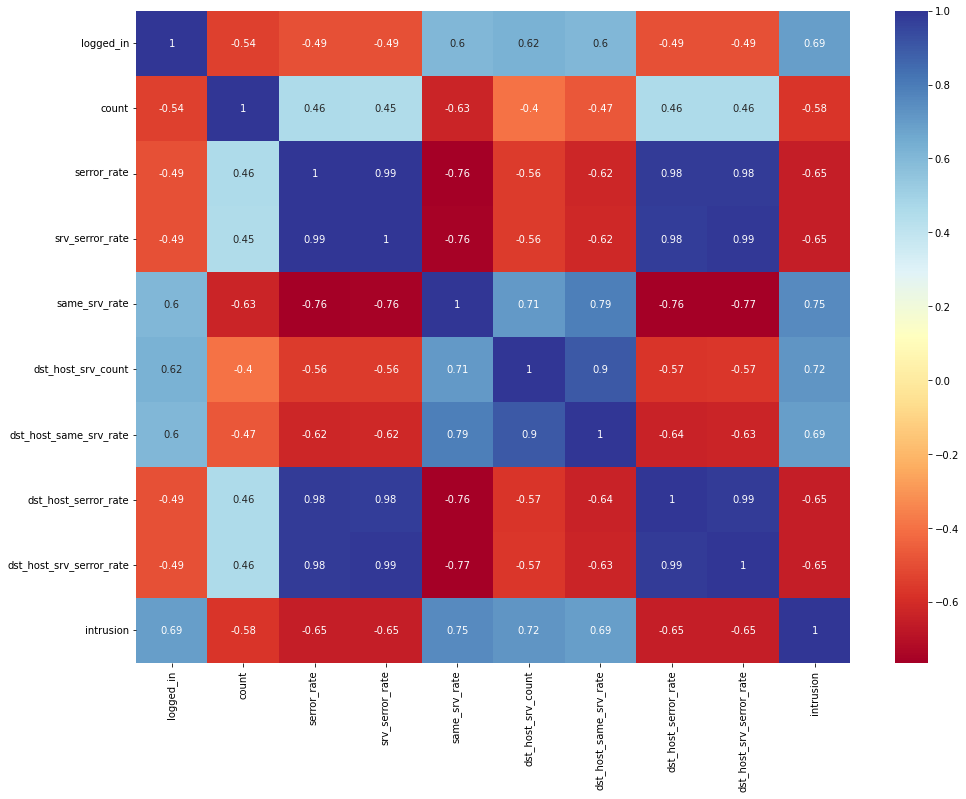

In [108]:
highest_corr_columns= highest_corr.index
plt.figure(figsize=(16,12))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlBu")

In [109]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


In [110]:
numeric_col = train_data.select_dtypes(include='number').columns

In [111]:
# STARDARD SCALING
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [112]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [113]:
data = standardization(train_data.copy(),numeric_col)
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
5,-0.110249,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.873089,-1.005110,-0.068553,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914,Dos
6,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.963422,-1.071933,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
7,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.909222,-1.027384,-0.068553,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
8,-0.110249,tcp,remote_job,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.836956,-0.960561,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
9,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.927289,-1.049659,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos


In [114]:
cat_col = ['protocol_type','service','flag']

categorical = data[cat_col]
categorical = pd.get_dummies(categorical,columns=cat_col)

Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']


In [115]:
# splitting the dataset into subsets. 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)

In [116]:
X_train = X_train.values
y_train = np.array(y_train)
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(94479, 1, 122)

In [117]:
lstm = Sequential()
lstm.add(LSTM(100,input_dim=122))
lstm.add(Dense(1,activation='sigmoid'))

In [118]:
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               89200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89,301
Trainable params: 89,301
Non-trainable params: 0
_________________________________________________________________


In [119]:
# TRAINING
model = lstm.fit(x_train, y_train, epochs=75, batch_size=5000,validation_split=0.1)

Epoch 1/75
18/18 [==============================] - 2s 56ms/step - loss: 0.5615 - accuracy: 0.8643 - val_loss: 0.4315 - val_accuracy: 0.9023
Epoch 2/75
18/18 [==============================] - 1s 39ms/step - loss: 0.3542 - accuracy: 0.9094 - val_loss: 0.2764 - val_accuracy: 0.9280
Epoch 3/75
18/18 [==============================] - 1s 37ms/step - loss: 0.2327 - accuracy: 0.9403 - val_loss: 0.1930 - val_accuracy: 0.9537
Epoch 4/75
18/18 [==============================] - 1s 36ms/step - loss: 0.1693 - accuracy: 0.9589 - val_loss: 0.1499 - val_accuracy: 0.9618
Epoch 5/75
18/18 [==============================] - 1s 36ms/step - loss: 0.1355 - accuracy: 0.9654 - val_loss: 0.1257 - val_accuracy: 0.9676
Epoch 6/75
18/18 [==============================] - 1s 36ms/step - loss: 0.1160 - accuracy: 0.9699 - val_loss: 0.1111 - val_accuracy: 0.9705
Epoch 7/75
18/18 [==============================] - 1s 38ms/step - loss: 0.1041 - accuracy: 0.9711 - val_loss: 0.1018 - val_accuracy: 0.9698
Epoch 8/75
18

Epoch 59/75
18/18 [==============================] - 1s 37ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0248 - val_accuracy: 0.9921
Epoch 60/75
18/18 [==============================] - 1s 36ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0245 - val_accuracy: 0.9913
Epoch 61/75
18/18 [==============================] - 1s 51ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0243 - val_accuracy: 0.9927
Epoch 62/75
18/18 [==============================] - 1s 38ms/step - loss: 0.0217 - accuracy: 0.9942 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 63/75
18/18 [==============================] - 1s 38ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0240 - val_accuracy: 0.9925
Epoch 64/75
18/18 [==============================] - 1s 36ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0238 - val_accuracy: 0.9930
Epoch 65/75
18/18 [==============================] - 1s 35ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0238 - val_accuracy: 0.9924
Epoch 

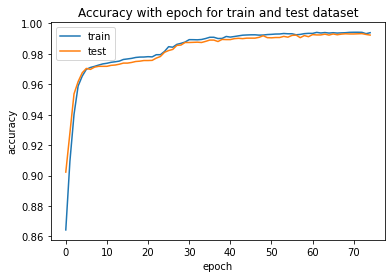

In [120]:
#ACCURACY GRAPH
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("Accuracy with epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best') 
plt.show()

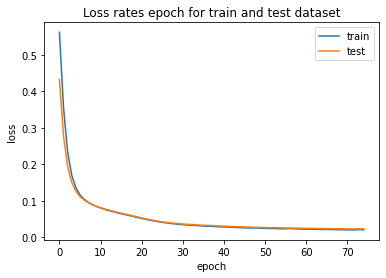

In [121]:
# LOSS RATE GRAPH
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("Loss rates epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [122]:
y_pred = lstm.predict(x_test)
y_pred.shape

985/985 [==============================] - 1s 845us/step


(31494, 1)

In [123]:
y_pred = lstm.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

985/985 [==============================] - 1s 922us/step


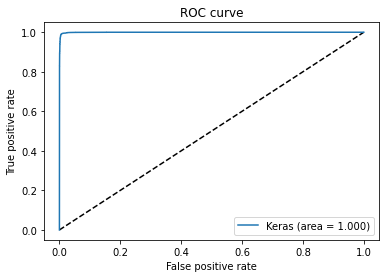

In [124]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [125]:
y_classes = (lstm.predict(x_test)>0.5).astype('int32')
print("Accuracy Score - ",accuracy_score(y_test,y_classes))
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

985/985 [==============================] - 1s 950us/step
Accuracy Score -  0.9921254842192163
Recall Score -  0.9910575891260284
F1 Score -  0.9925961308812992
Precision Score -  0.9941394570027509


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print('Confusion Matrix:')
cm = confusion_matrix(y_train, X_train)
pd.DataFrame(cm).head(2)